In [1]:
""" library mathematic & statistic  """
import numpy as np
""" library for machine learning """
from sklearn.model_selection import train_test_split
"""My library"""
from mylib.EM_pMLE import EM_pMLE 
from mylib.sampling_gaussian_mixture_model import sampling_gaussian_mixture_model
"""   Generate data library"""
from sklearn.datasets import make_blobs
""" data visualization  and graphical plotting library """
import matplotlib
import matplotlib . pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
"""Generte Data """
n_samples_ = 1000
k = 20
X, y_true = make_blobs(n_samples=n_samples_,
                       n_features = 2 , centers=k,
                       cluster_std=0.5,
                       random_state=0)

In [2]:
%%time
"""training data """
model = EM_pMLE().fit(X , n_components=20)

CPU times: user 3.18 s, sys: 91.4 ms, total: 3.27 s
Wall time: 2.7 s


In [3]:
%%time
"""predictions data testing  """
labels = model.predict(X)

CPU times: user 9.69 ms, sys: 1.98 ms, total: 11.7 ms
Wall time: 11.6 ms


In [4]:
"""test convergence """
model.converged

True

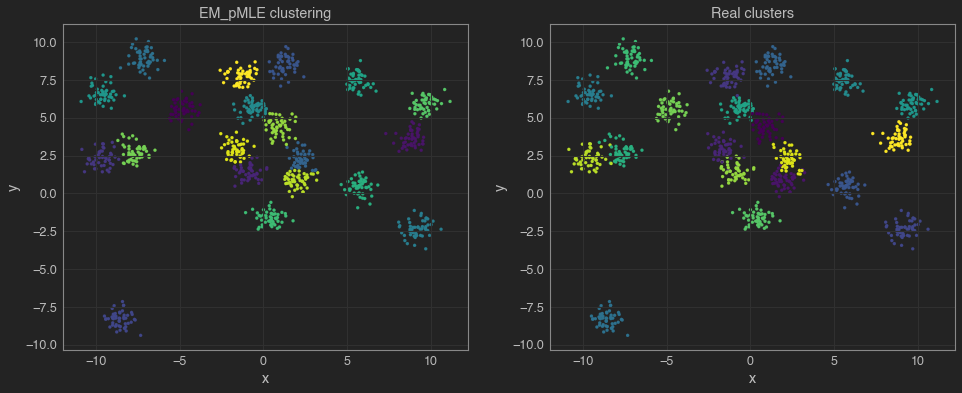

In [5]:
"""Plotting data """
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(X[:,0], X[:,1], s = 10  ,c = labels , cmap='viridis')
ax2.scatter(X[:,0], X[:,1], s = 10 , c = y_true, cmap='viridis')
ax1.set_title('EM_pMLE clustering')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_title('Real clusters')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

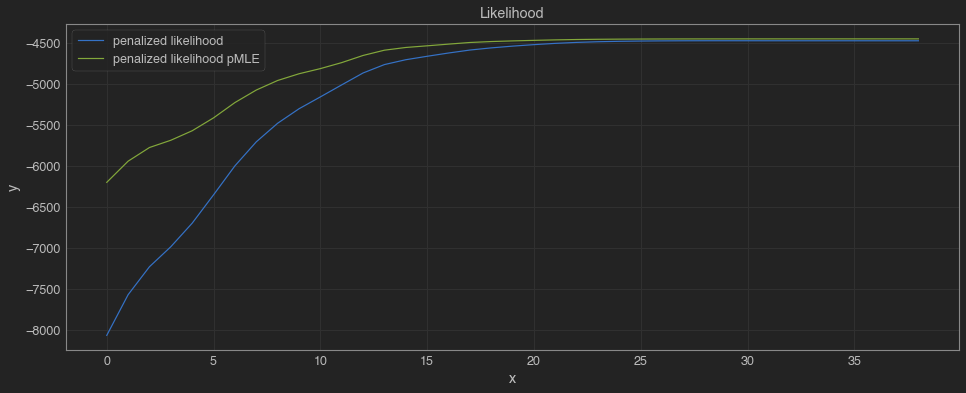

In [6]:
max_likelihood = model.max_likelihood
max_likelihood_limited = model.max_likelihood_limited
""" Plotting data """
fig = plt.figure(figsize=(16,6))
plt.plot(range(len(max_likelihood)), max_likelihood )
plt.plot(range(len(max_likelihood_limited)), max_likelihood_limited )
plt.title('Likelihood')
plt.legend(["penalized likelihood", "penalized likelihood pMLE"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

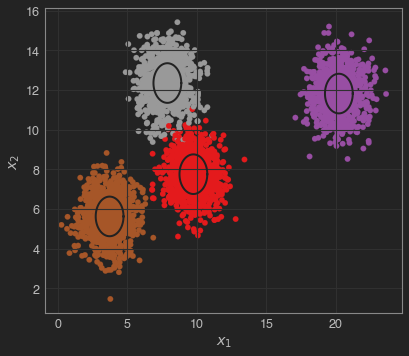

In [77]:
n_components      = 4                 # number of components to generate 
dim               = 2                 # dimension of dataset 
k                 = n_components      # composents of F function 
n_samples         = 4000              # numbers of samples of data 
option            = 'random_weights'  # option probability of weights 
global_components =   4               # global components of data to generate 
model_gmm_sampling = sampling_gaussian_mixture_model(n_components ,dim ).fit(n_samples ,
                    Adjusting_weights = 'equal_weights' 
                    , edge            = global_components  
                    , upper           = 10
                    , n_points        = 100 
                    , epsilon_noise   = 2.
                    ,draw_ellipse = True)
data_gmm    = model_gmm_sampling.X
labels_gmm  = model_gmm_sampling.labels


In [78]:
%%time
"""training data """
model = EM_pMLE().fit( data_gmm , n_components=4)

CPU times: user 1.09 s, sys: 71.3 ms, total: 1.16 s
Wall time: 711 ms


In [79]:
%%time
"""predictions data testing  """
labels = model.predict(data_gmm)

CPU times: user 4.55 ms, sys: 1.91 ms, total: 6.47 ms
Wall time: 6.92 ms


In [80]:
"""test convergence """
model.converged

True

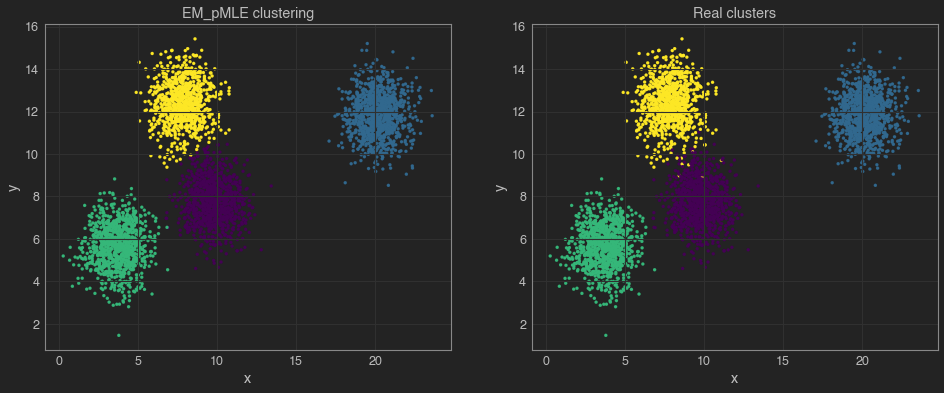

In [81]:
"""Plotting data """
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(data_gmm[:,0], data_gmm[:,1], s = 10  ,c = labels , cmap='viridis')
ax2.scatter(data_gmm[:,0], data_gmm[:,1], s = 10 , c = labels_gmm, cmap='viridis')
ax1.set_title('EM_pMLE clustering')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_title('Real clusters')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

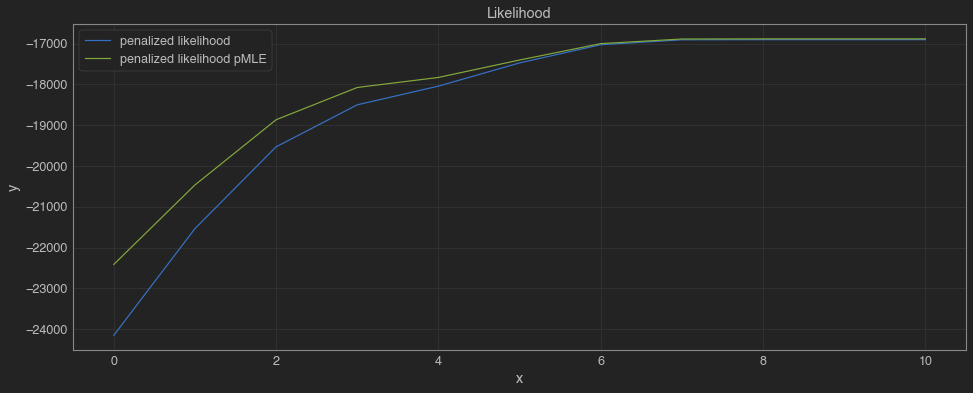

In [82]:
max_likelihood = model.max_likelihood
max_likelihood_limited = model.max_likelihood_limited
""" Plotting data """
fig = plt.figure(figsize=(16,6))
plt.plot(range(len(max_likelihood)), max_likelihood )
plt.plot(range(len(max_likelihood_limited)), max_likelihood_limited )
plt.title('Likelihood')
plt.legend(["penalized likelihood", "penalized likelihood pMLE"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()